In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [34]:
N = 100
sample = np.random.normal(size=100)

In [3]:
gamma = 0.95

In [40]:
def plot_int(low_lim, high_lim, title= None, ylim=None):

    low = [low_lim(sample[0:i+1]) for i in range(len(sample))]
    high = [high_lim(sample[0:i+1]) for i in range(len(sample))]
    
    plt.grid(True)
    plt.plot(np.arange(len(sample))+1, low, color='black')
    plt.plot(np.arange(len(sample))+1, high, color='black')
    plt.fill_between(np.arange(len(sample))+1, low, high, facecolor='green')
    if title:
        plt.title(title, fontsize=25)
    if ylim:
        plt.ylim(ylim)
    plt.xlabel('sample size', fontsize=20)
    plt.ylabel('parameter', fontsize=20)
    plt.show()

Доверительный интервал уровня $\gamma$ для $\mathcal{N}(\theta,1)$:

- $(\bar{X} - Z_{\frac{1+\gamma}{2}}\frac{1}{\sqrt{N}}, \bar{X} + Z_{\frac{1+\gamma}{2}}\frac{1}{\sqrt{N}})$

где $Z_{(\frac{1+\gamma}{2})}$ - квантиль распределения $\mathcal{N}(0,1)$ уровня $\frac{1 + \gamma}{2}$

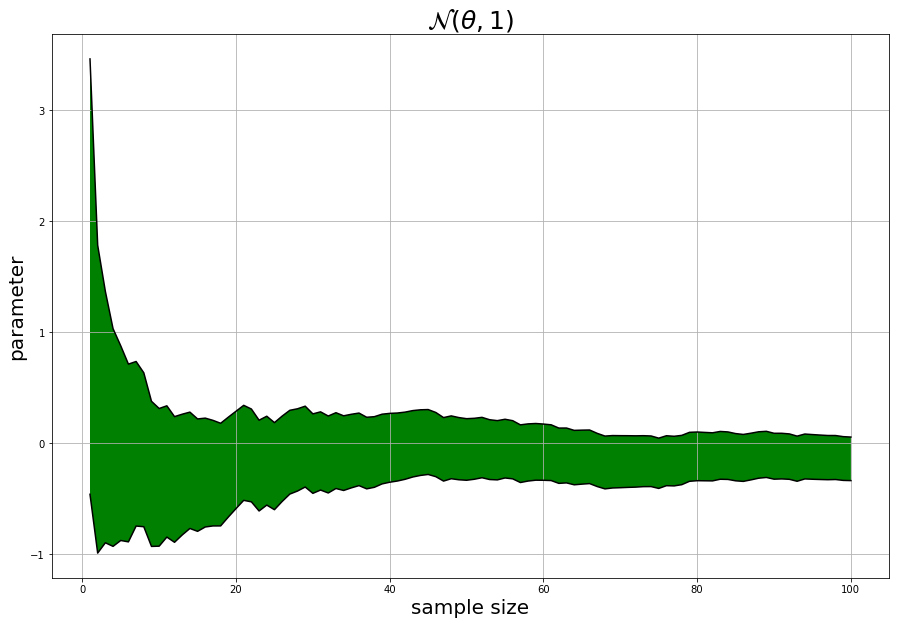

In [24]:
from scipy.stats import norm
Z = norm.ppf((1 + gamma)/2)
plot_int((lambda sample: np.mean(sample) - Z * len(sample)**(-0.5)),
         (lambda sample: np.mean(sample) + Z * len(sample)**(-0.5)), 
         title=u'$\mathcal{N}(\\theta,1)$')

Доверительный интервал уровня $\gamma$ для $\mathcal{N}(0,\theta)$:

- ($\frac{\sum_{i=1}^{n}{X_i^2}}{\nu_{\frac{1+\alpha}{2}}},\frac{\sum_{i=1}^{n}{X_i^2}}{\nu_{\frac{1-\alpha}{2}}})$, где $\nu$ квантиль распределения $\chi^2_n$

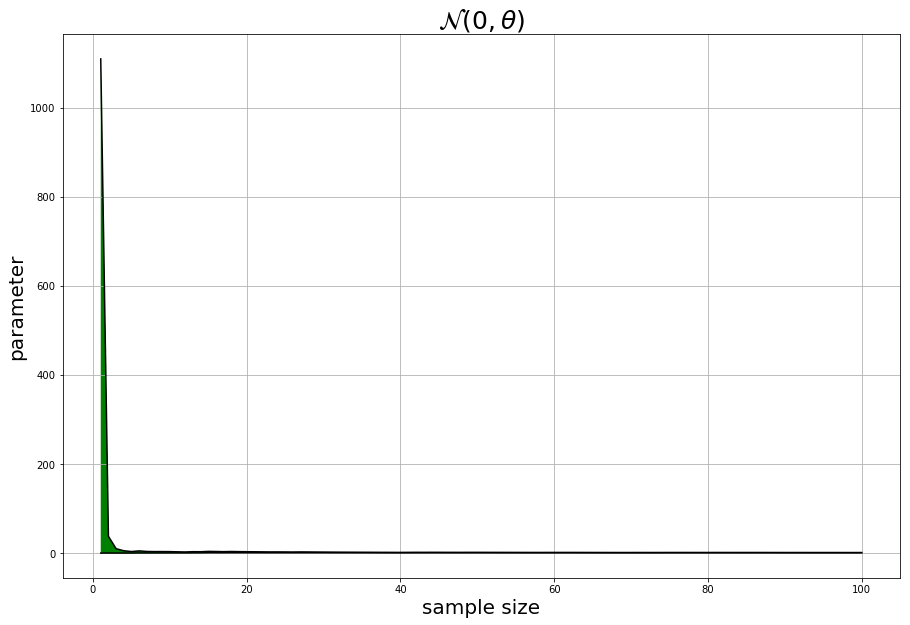

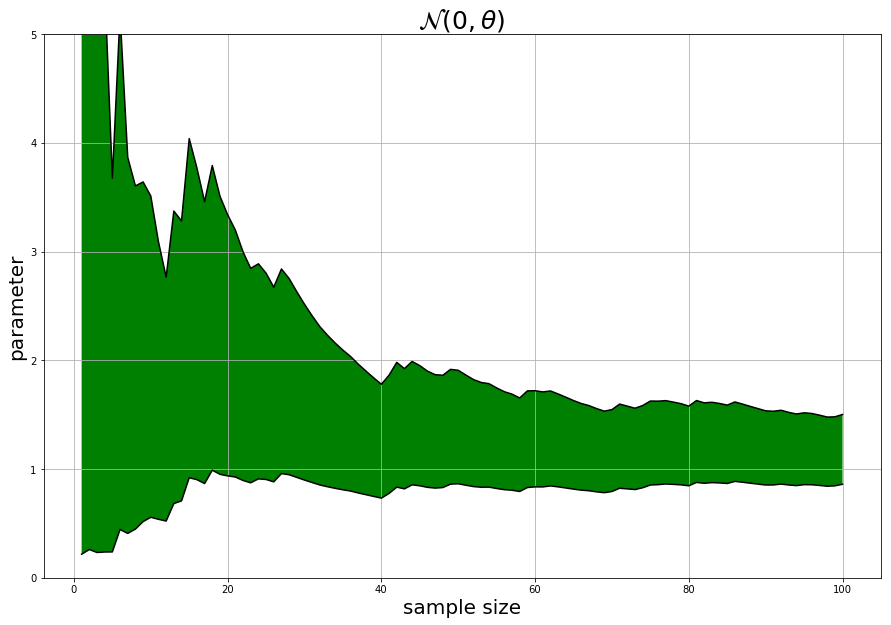

In [47]:
from scipy.stats import chi2

plot_int(lambda sample: np.sum(sample**2)/chi2.ppf(df=len(sample), q=(1 + gamma)/2),
            lambda sample: np.sum(sample**2)/chi2.ppf(df=len(sample), q=(1 - gamma)/2), 
            title=u'$\mathcal{N}(0,\\theta)$')

plot_int(lambda sample: np.sum(sample**2)/chi2.ppf(df=len(sample), q=(1 + gamma)/2),
            lambda sample: np.sum(sample**2)/chi2.ppf(df=len(sample), q=(1 - gamma)/2), 
            title=u'$\mathcal{N}(0,\\theta)$', ylim = (0, 5))

Доверительный интервал уровня $\gamma$ для $\mathcal{N}(\theta,\sigma^2)$:

- $(\bar{X} - t_{\frac{1+\gamma}{2}}\frac{\tilde{s}}{\sqrt{N}}, \bar{X} + t_{\frac{1+\gamma}{2}}\frac{\tilde{s}}{\sqrt{N}})$

где $t_{(\frac{1+\gamma}{2})}$ - квантиль распределения Стьюдента с $n-1$ степенью свободы уровня $\frac{1 + \gamma}{2}$,
$\tilde{s} = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ - стандартное отклонение

/home/pavel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/home/pavel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


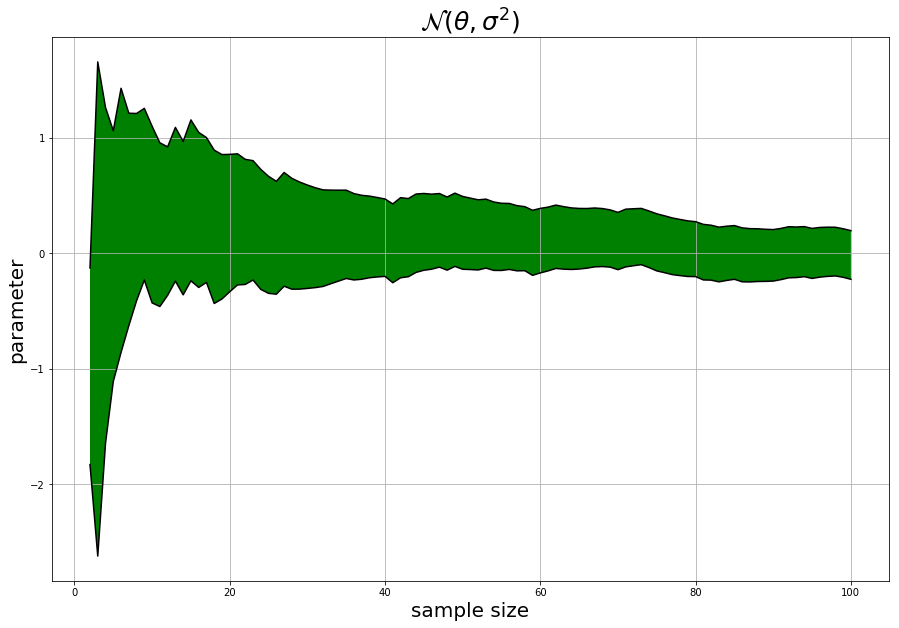

In [43]:
from scipy.stats import t
plot_int(lambda sample: np.mean(sample) - (np.var(sample) / (len(sample)-1)) ** 0.5 * t.ppf((1 + gamma) / 2, df=len(sample)-1),
         lambda sample: np.mean(sample) + (np.var(sample) / (len(sample)-1)) ** 0.5 * t.ppf((1 + gamma) / 2, df=len(sample)-1), 
         title=u'$\mathcal{N}(\\theta,\sigma^2)$')

Доверительный интервал уровня $\gamma$ для $\mathcal{N}(a, \theta)$:

- ($\frac{(n-1)\tilde{s}^2}{\mu_{\frac{1+\alpha}{2}}}, \frac{(n-1)\tilde{s}^2}{\mu_{\frac{1-\alpha}{2}}})$, где $\nu$ квантиль распределения $\chi^2_{n-1}$, $\tilde{s} = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ - стандартное отклонение

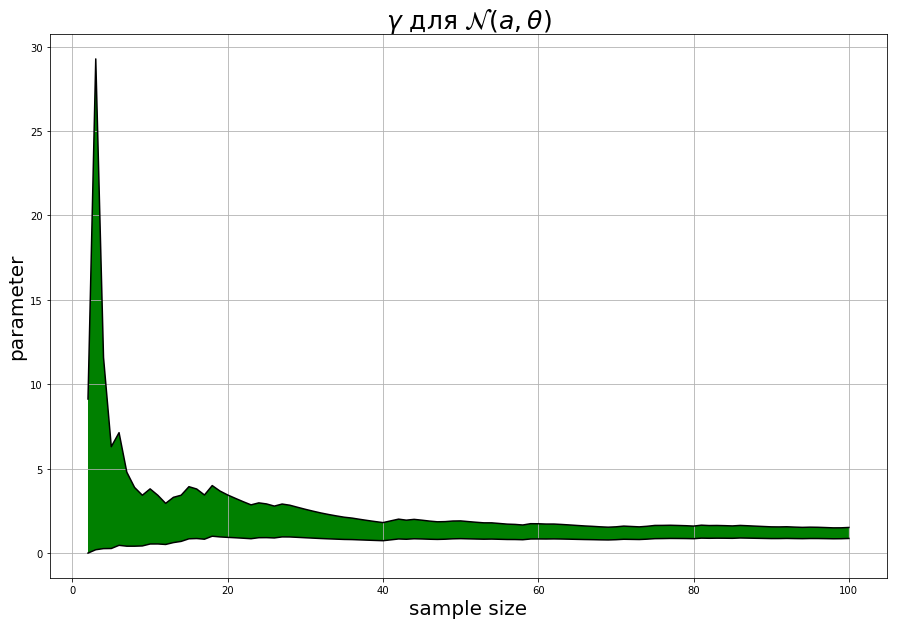

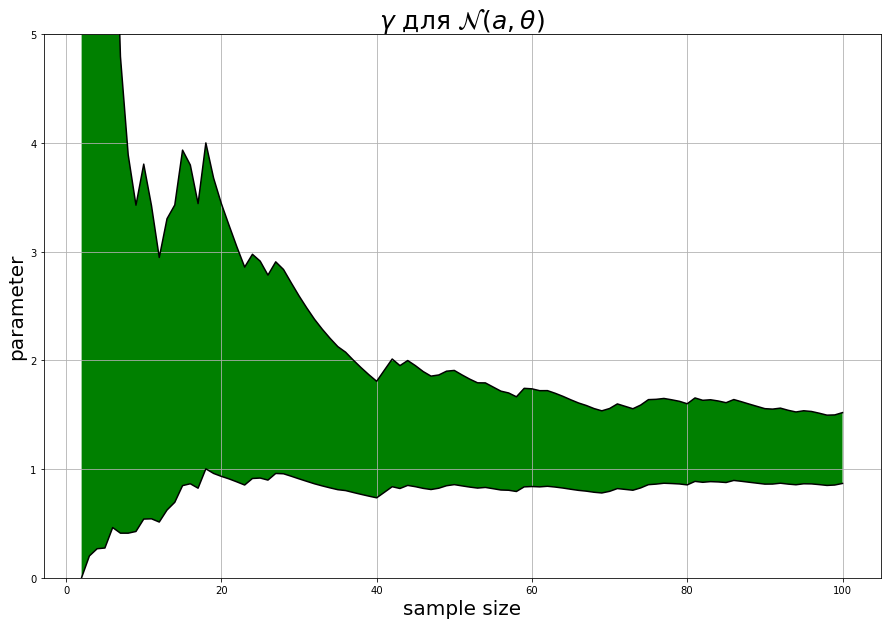

In [46]:
plot_int(lambda sample: len(sample)*np.var(sample)/chi2.ppf(df=len(sample)-1, q=(1 + gamma)/2),
         lambda sample: len(sample)*np.var(sample)/chi2.ppf(df=len(sample)-1, q=(1 - gamma)/2), 
         title=u'$\gamma$ для $\mathcal{N}(a, \\theta)$')

plot_int(lambda sample: len(sample)*np.var(sample)/chi2.ppf(df=len(sample)-1, q=(1 + gamma)/2),
         lambda sample: len(sample)*np.var(sample)/chi2.ppf(df=len(sample)-1, q=(1 - gamma)/2), 
         title=u'$\gamma$ для $\mathcal{N}(a, \\theta)$', ylim=(0, 5))

### Выводы:

1) Знание второго параметра дает небольшой выигрыш в ширине доверительного интервала. <br>
2) Чем больше выборка, тем доверительный интервал уже, но начиная с какого-то размера (40-60) существенно сужаться он пререстает.<br>
3) Для оценки дисперсии (второго параметра) особенно важно сделать выборку достаточно большой (хотя бы 20-40). 